## Descripción del Ejercicio

Dado los datos en el archivo .csv realizar las siguientes actividades:

1.   **Realizar un gráfico de dispersión de la variable dependiente versus cada una de las variables cuantitativas.** 

*   *Es posible observar una relación entre los valores de las variables cuantitativas y la variable dependiente?*

------------------------------------------------------------------------

2.   **Realizar un gráfico box-plot de la variable dependiente acorde con las categorías de las variables categóricas.**

*    *Es posible observar un comportamiento diferente de la variable dependiente para las diferentes categorías de cada una de las variables?*

*    *En cual de estas variables es más evidente?*

------------------------------------------------------------------------

3.   **Compare un modelo lineal que relacione la variable dependiente (como variable de respuestas) con las variables que se consideran significativas acorde al desarrollo de los dos incisos anteriores**

------------------------------------------------------------------------

4.   **Realizar un modelo predictivo utilizando análisis de regresión para estimar el peso de los peces**


## Desarollo del Ejercicio

### Importaciones

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import warnings
from google.colab import drive

drive.mount('drive')
warnings.filterwarnings('ignore')

df = pd.read_csv('./Fish.csv')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


### **Ejercicio 1**

#### Realizar un gráfico de dispersión de la variable dependiente versus cada una de las variables cuantitativas.

In [ ]:
def graficar_variable_dependiente_vs_cuantitativa(df, variable_dependiente):
    if variable_dependiente not in df.columns:
        return f"ERROR: Variable '{variable_dependiente}' no se encuentra en conjunto de datos"
    if df[variable_dependiente].dtype == "object":
        return "ERROR: Variable dependiente DEBE ser cuantitativa"
    else:
        df_variables_cuantitativas = df.select_dtypes(exclude="object")
        variables = df_variables_cuantitativas.columns
        plt.figure(figsize=(15, 15))
        for i in range(len(variables)):
            ax = plt.subplot(3, 3, i+1)
            if variables[i] == variable_dependiente:
                sns.distplot(df[variables[i]], ax=ax)
                ax.set_title(f"Distribución de Variable Dependiente: {variable_dependiente}")
            else:
                plt.scatter(df[variables[i]], df[variable_dependiente])
                plt.title(f"Variable Dependiente: {variable_dependiente} vs {variables[i]}")
                plt.xlabel(variables[i])
                plt.ylabel(variable_dependiente)
        plt.tight_layout()

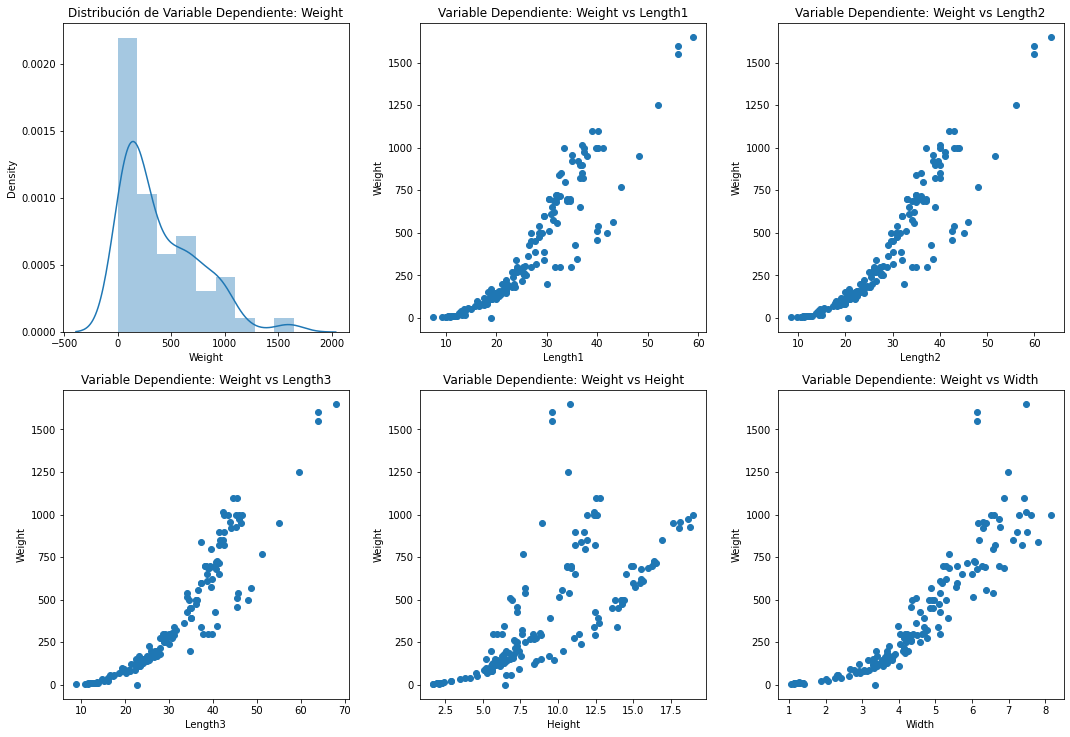

In [ ]:
graficar_variable_dependiente_vs_cuantitativa(df, "Weight")

#### Es posible observar una relación entre los valores de las variables cuantitativas y la variable dependiente?

Sí. Se observa una clara tendencia ascendiente de la variable dependiente conforme las demás aumentan, por lo cual puede concluirse (con cierto grado de certeza) que: Existe una correlación positiva entre la variable dependiente y todas las demás variables.

### **Ejercicio 2**

#### Realizar un gráfico box-plot de la variable dependiente acorde con las categorías de las variables categóricas.

In [ ]:
def graficar_variable_dependiente_vs_categorias(df, variable_dependiente):
    categorias = df["Species"].unique()
    f = plt.figure(figsize=(20,20))
    for i in range(len(categorias)):
        ax = plt.subplot(4, 4, i+1)
        vector_weight = df[df["Species"] == categorias[i]]["Weight"]
        ax.boxplot(vector_weight, medianprops=dict(color="blue"))
        ax.set_xticks([])
        plt.title(f"Boxplot Weight en categoría: {categorias[i]}")
        plt.ylabel(variable_dependiente)
    
    plt.show()

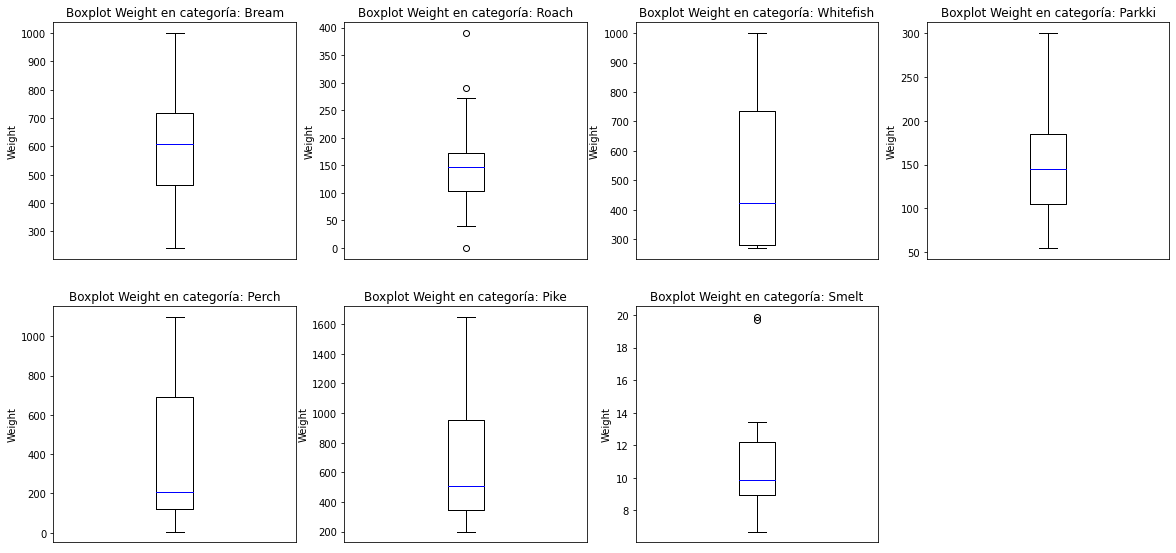

In [ ]:
graficar_variable_dependiente_vs_categorias(df, "Weight")

#### ¿Es posible observar un comportamiento diferente de la variable dependiente para las diferentes categorías de cada una de las variables?

Sí. La variable dependiente se comporta de manera distinta en cada categoría, con valores similares como entre la categoría 'Pike' y 'Whitefish', pero otros radicalmente distintos, como por ejemplo la categoría 'Smelt' con respecto a todas las demás

#### ¿En cual de estas variables es más evidente?

La categoría 'Smelt' presenta valores especialmente inferiores con respecto a todas las demás categorías, siendo un valor extremo para esta categoría el de 19.9, dicha cifra es superada en un ámplio margen por todas las demás categorías

### **Ejercicio 3**

#### Compare un modelo lineal que relacione la variable dependiente (como variable de respuestas) con las variables que se consideran significativas acorde al desarrollo de los dos incisos anteriores

In [ ]:
# Elegir variables más significativas
df_sig = df[["Weight", "Species", "Length3", "Height"]]

# Transformar variables categóricas
df_dummies = pd.get_dummies(df_sig)

# Obtener variable dependiente y variable independiente
X = df_dummies.drop("Weight", axis=1)
y = df_dummies["Weight"]

# Función para ajustar modelo lineal
def ajustar_modelo_lineal(X, y):
    regresion_lineal = LinearRegression().fit(X, y)
    r2 = regresion_lineal.score(X, y)
    print(f"\t Variable dependiente ---> Weight \n \n \n \t Variables independientes: {X.columns.values} \n \n \n \t Modelo Lineal con puntaje de R^2: {round(r2, 2)}")
    return

In [ ]:
ajustar_modelo_lineal(X, y)

	 Variable dependiente ---> Weight 
 
 
 	 Variables independientes: ['Length3' 'Height' 'Species_Bream' 'Species_Parkki' 'Species_Perch'
 'Species_Pike' 'Species_Roach' 'Species_Smelt' 'Species_Whitefish'] 
 
 
 	 Modelo Lineal con puntaje de R^2: 0.93


### **Ejercicio 4**

#### Realizar un modelo predictivo utilizando análisis de regresión para estimar el peso de los peces

In [ ]:
class RegresionLinealPropia():
    def __init__(self, tasa_aprendizaje=0.001, n_iters=100000):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.n_iters = n_iters
        self.pesos = None
        self.sesgo = None
    
    def ajustar(self, X, y):

        n_muestras = X.shape[0]
        self.pesos = np.zeros(1)
        self.sesgo = 0

        for _ in range(self.n_iters):
            # Por cada iteración
            # Obtener aproximación del modelo
            prediccion = np.dot(X, self.pesos) + self.sesgo

            # Calcular gradiente de la función de pérdida con respecto a la pendiente
            dw = (1/n_muestras) * np.dot(X.T, (prediccion - y))

            # Calcular gradiente de la función de pérdida con respecto a la intersección
            db = (1/n_muestras) * np.sum(prediccion - y)

            # Aplicar técnica del descenso de la gradiente
            self.pesos -= self.tasa_aprendizaje * dw
            self.sesgo -= self.tasa_aprendizaje * db

    def predecir(self, X):
        prediccion = np.dot(X, self.pesos) + self.sesgo
        plt.figure(figsize=(15, 10))
        plt.scatter(X, y)
        plt.plot(X, prediccion, 'r')
        plt.title("Regresion Lineal")
        plt.show()

In [ ]:
variable_length = X["Length3"].to_numpy().reshape(-1,1)
regresion_lineal_propia = RegresionLinealPropia()
regresion_lineal_propia.ajustar(variable_length, y.to_numpy())

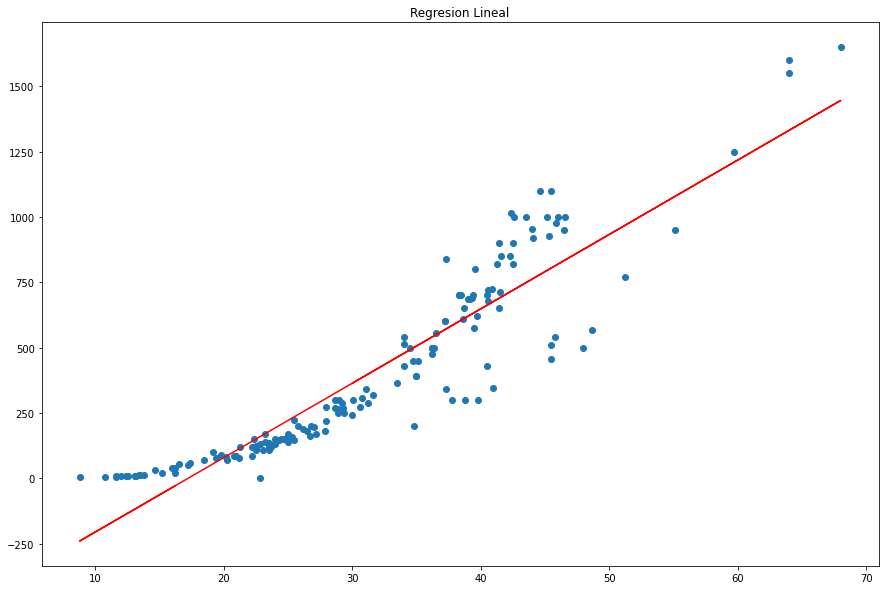

In [ ]:
regresion_lineal_propia.predecir(variable_length)